In [13]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
NEURAL_NETWORKS = ['DenseNet201', 'MobileNetV2', 'InceptionV3', "ResNet50"]
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados"


In [24]:
main_pd = pd.DataFrame()
pds = []
for network in NEURAL_NETWORKS:
    output_file = results_path / 'analitycs' / 'by_train' / '_pre_plot' / f'{network}_result_for_analytic.csv'
    readed = pd.read_csv(output_file)
    pds.append(readed)

main_pd = pd.concat(pds)

In [151]:
def makedatFile(network, attribute, x, y):
  f = open(results_path / 'analitycs' / 'by_train' / '_pre_plot' / 'dats' /f"{network}_{attribute}.dat", "w+")
  f.write("x F(x)\n")
  for i, axisx in enumerate(x):
     f.write(f"{axisx} {y[i]}\n")

In [152]:
main_pd

,subset,model,runtime,val_runtime,total_runtime,accuracy_mean,accuracy_median,accuracy_lower,accuracy_upper,accuracy_lower_whisker,...,val_npv_lower,val_npv_upper,val_npv_lower_whisker,val_npv_upper_whisker,val_mcc_mean,val_mcc_median,val_mcc_lower,val_mcc_upper,val_mcc_lower_whisker,val_mcc_upper_whisker
0,5,DenseNet201,280.643584,21.313709,301.957292,88.970499,89.120725,88.603845,89.507118,87.248936,...,88.133702,89.650129,85.859061,91.924769,77.908019,78.168240,76.256460,79.326965,71.650703,83.932722
1,10,DenseNet201,285.591305,20.736673,306.327978,92.279468,92.424217,91.860193,92.935079,90.247864,...,91.085295,92.136776,89.508074,93.713998,83.225301,83.279902,82.208636,84.141460,79.309401,87.040696
2,15,DenseNet201,252.470955,20.218766,272.689721,94.174657,94.386494,93.465680,94.962670,91.220195,...,92.236672,93.456696,90.406637,95.286731,85.831933,85.782486,84.708303,87.010038,81.255701,90.462640
3,20,DenseNet201,237.816697,19.481501,257.298198,95.789815,95.967811,94.663550,96.930285,91.263448,...,93.452623,94.506344,91.872042,96.086925,88.085852,88.102236,87.068547,89.065021,84.073836,92.059732
4,25,DenseNet201,235.830205,18.751458,254.581663,97.233779,97.551546,96.322472,98.444179,93.139913,...,94.726448,95.380855,93.744837,96.362465,90.034286,90.106604,89.345516,90.792887,87.174460,92.963943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,80,ResNet50,160.822083,3.720533,164.542617,94.208012,95.570540,93.392019,96.231437,89.132892,...,84.655996,95.796095,67.945847,112.506244,74.260442,89.670703,71.503009,91.550815,41.431300,121.622524
16,85,ResNet50,160.077265,3.695955,163.773221,94.077561,95.372868,93.592644,96.265227,89.583769,...,88.675974,95.834604,77.938030,106.572548,75.481290,88.585946,73.739615,91.585755,46.970405,118.354966
17,90,ResNet50,157.614939,3.636831,161.251770,94.106954,95.467934,92.934553,96.517862,87.559590,...,89.079115,95.999244,78.698921,106.379437,76.208812,89.498752,77.439253,92.017241,55.572271,113.884223
18,95,ResNet50,153.136700,3.561598,156.698299,94.309614,95.341691,93.582986,96.277566,89.541116,...,80.323865,95.728016,57.217637,118.834243,72.261662,86.834559,60.440390,91.416968,13.975522,137.881836


In [5]:
# valores maximos e minos das acuracias
main_pd['accuracy_median'].max()
main_pd['accuracy_median'].min()

81.92686140537262

In [25]:

# Combinando todos os valores de ROIs
full_rois = np.unique(np.concatenate([main_pd['subset']]))
range_rois =  np.arange(5, 100, 10)


In [26]:
def plot_comparison(main_pd, attribute, title, xlabel, xticks, figsize=(10, 6), yticks=None):
    """
    Função para plotar comparações de um atributo específico entre diferentes arquiteturas de CNN.

    :param main_pd: DataFrame contendo todos os dados.
    :param attribute: Atributo a ser plotado (string).
    :param title: Título do gráfico.
    :param xlabel: Rótulo do eixo X.
    :param xticks: Marcas do eixo X.
    :param figsize: Tamanho da figura do gráfico.
    :param yticks: Marcas do eixo Y (opcional).

    obs:
    300+ dpi
    16px font
    export to pdf and plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    for network in NEURAL_NETWORKS:
        network_data = main_pd[main_pd['model'] == network]
        x = network_data['subset']
        y = network_data[attribute]
        ax.plot(x, y, marker='o', linestyle='-', label=network)
        print(network)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(attribute.replace('_', ' ').capitalize())
    ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

    # make folder to save graphics
    if not os.path.exists(results_path / 'analitycs' / 'by_train' / 'graphics'):
        os.makedirs(results_path / 'analitycs' / 'by_train' / 'graphics')
    plt.savefig(results_path / 'analitycs' / 'by_train' / 'graphics' / f"{attribute}.pdf", dpi=300)

    plt.show() 

DenseNet201
MobileNetV2
InceptionV3
ResNet50


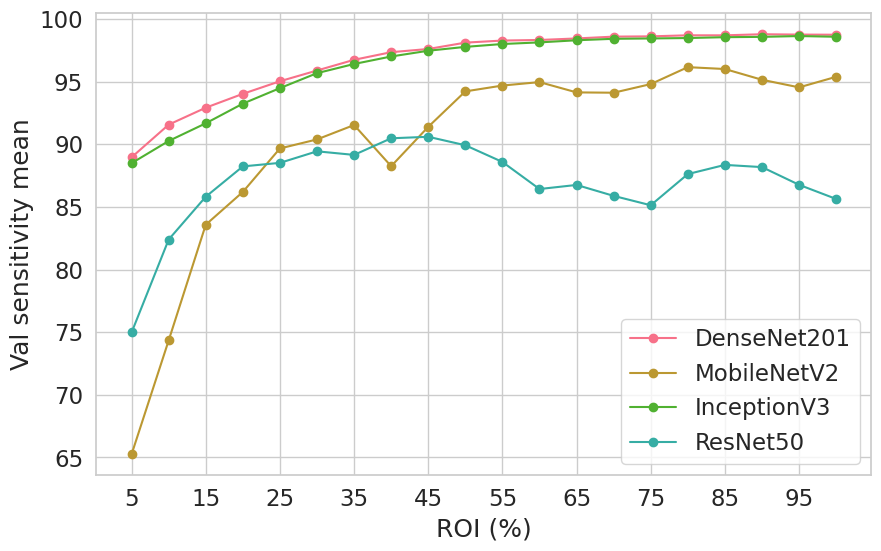

In [27]:
plot_comparison(main_pd, 'val_sensitivity_mean', '', 'ROI (%)', range_rois)

DenseNet201
MobileNetV2
InceptionV3
ResNet50


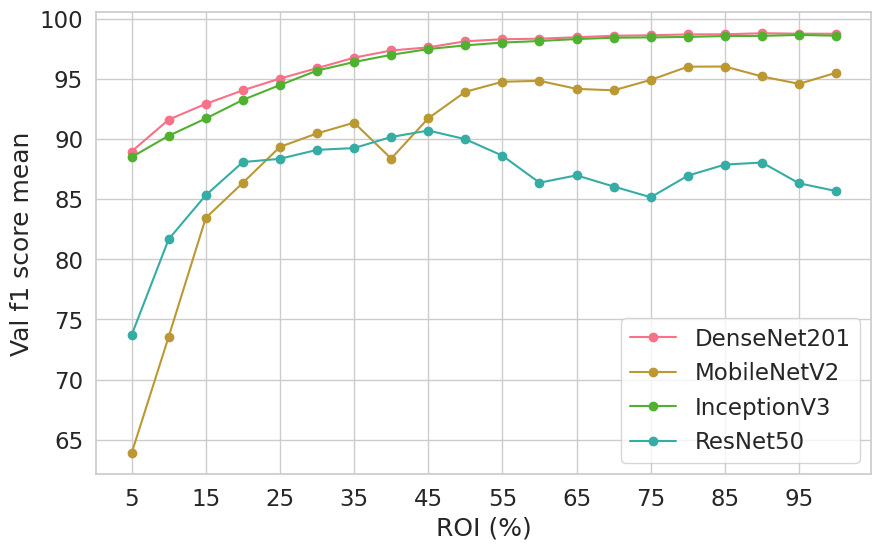

In [28]:
plot_comparison(main_pd, 'val_f1_score_mean', '', 'ROI (%)', range_rois)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


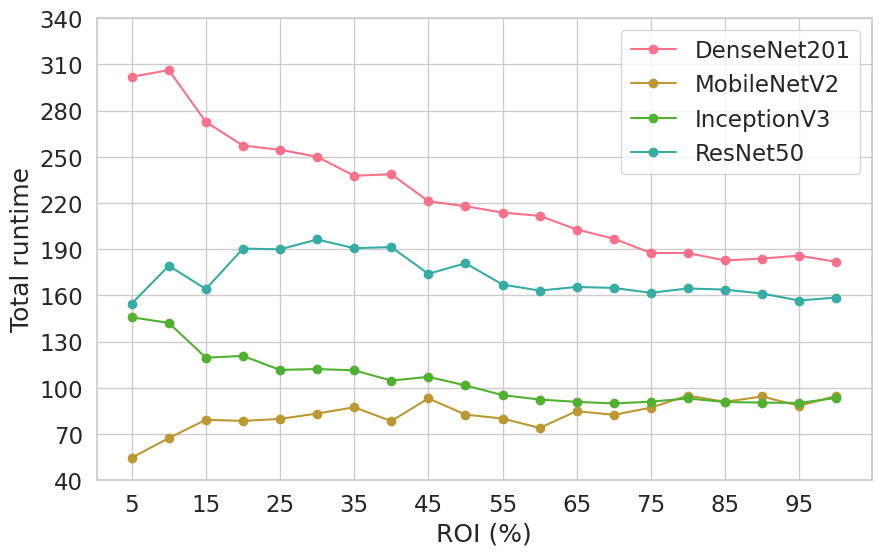

In [29]:
# Valores para os ticks do eixo Y
range_time = np.arange(40, 360, 30)

plot_comparison(main_pd, 'total_runtime', '', 'ROI (%)', range_rois, yticks=range_time)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


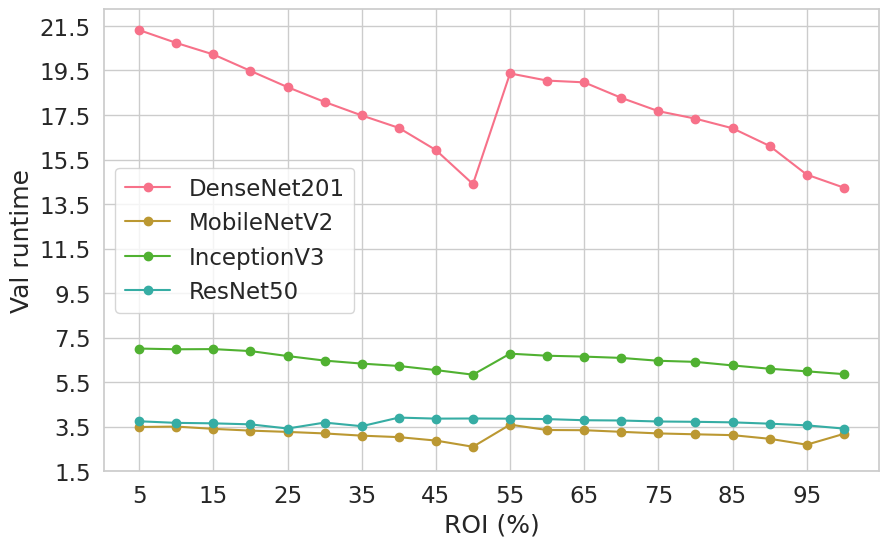

In [30]:
# Valores para os ticks do eixo Y ajustados para o tempo de validação
range_time_validation = np.arange(1.5, 23.5, 2)

plot_comparison(main_pd, 'val_runtime', '', 'ROI (%)', range_rois, yticks=range_time_validation)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


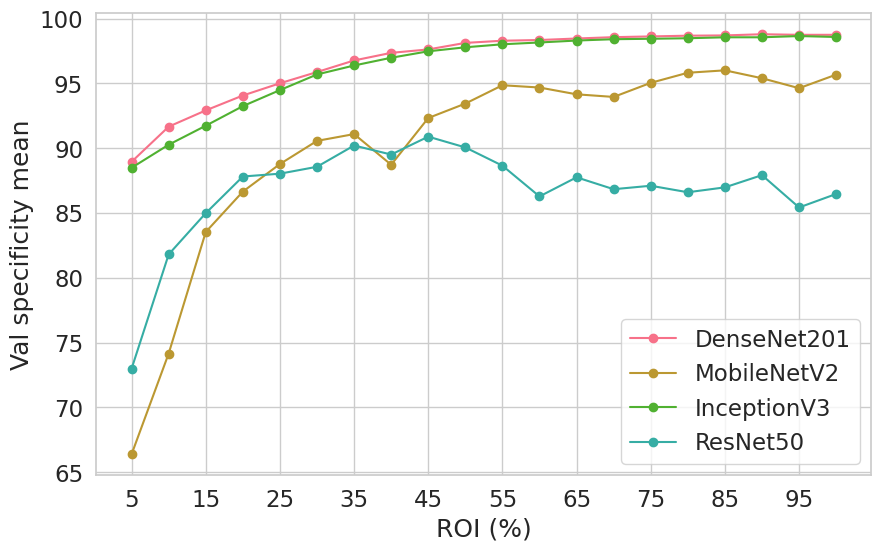

In [31]:

plot_comparison(main_pd, 'val_specificity_mean', '', 'ROI (%)', range_rois)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


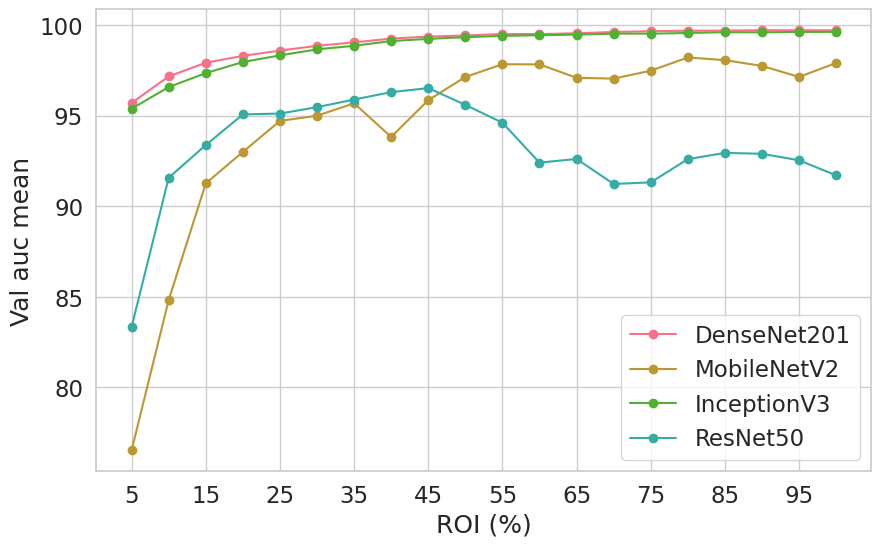

In [33]:
plot_comparison(main_pd, 'val_auc_mean', '', 'ROI (%)', range_rois)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


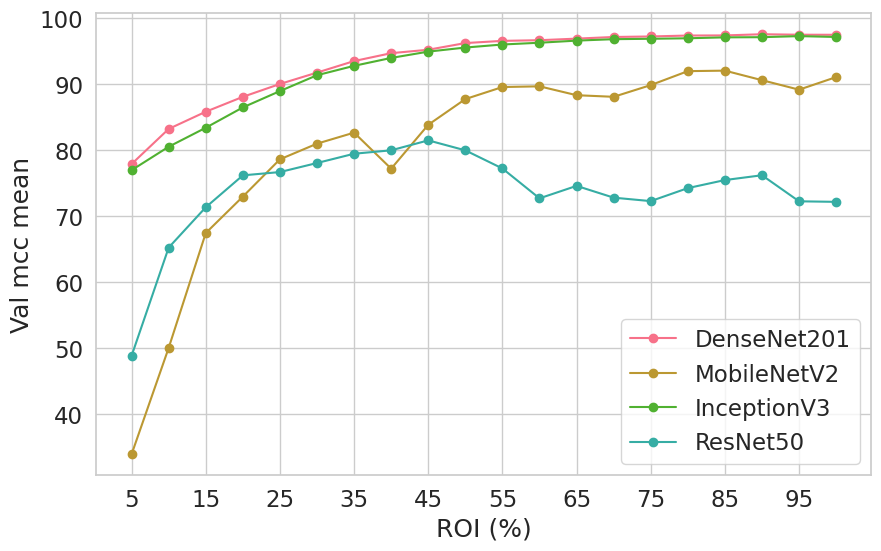

In [34]:
plot_comparison(main_pd, 'val_mcc_mean', '', 'ROI (%)', range_rois)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


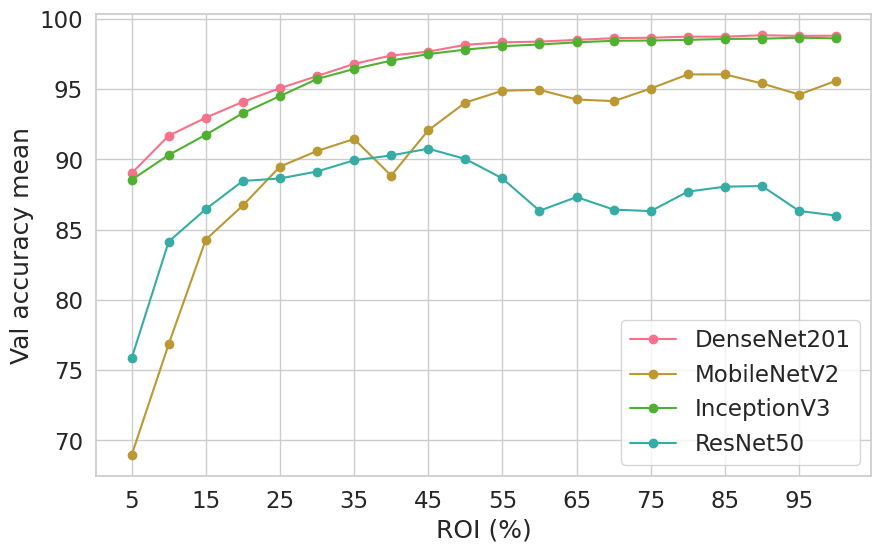

In [35]:
plot_comparison(main_pd, 'val_accuracy_mean', '', 'ROI (%)', range_rois)

DenseNet201
MobileNetV2
InceptionV3
ResNet50


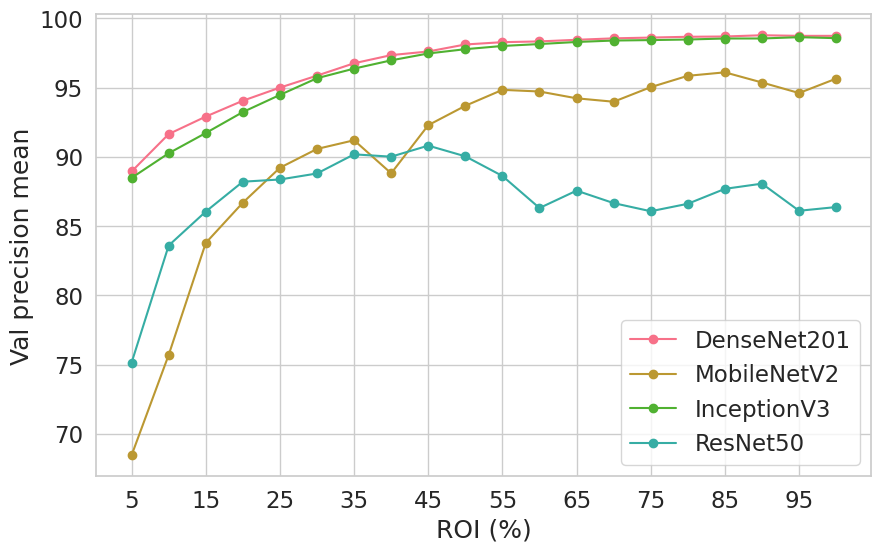

In [36]:
plot_comparison(main_pd, 'val_precision_mean', '', 'ROI (%)', range_rois)